# Loading the data
Make sure the CSV files provided by Zindi are in the same folder as this notebook. If it's running on Google Colab, you can use the 'files' tab on the left to upload them. We load the training data from Train.csv, and print out the variable descriptions here for easy reference. 

In [71]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings(action='ignore')

In [181]:
df = pd.read_csv('data/Train.csv')
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [182]:
# drop the non-numerical features
df = df.drop(['ward', 'ADM4_PCODE'], axis=1)

In [183]:
# Train test split with same random seed
# Defining X and y
features = df.columns.tolist()
features.remove('target')
X = df[features]
y = df.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2116, 60)
y_train: (2116,)
X_test: (706, 60)
y_test: (706,)


In [184]:
# Build a multiple linear regression model with the data
lr = LinearRegression()
# fitting the training data
lr.fit(X_train,y_train)

LinearRegression()

In [185]:
# Feature Importance

import eli5
eli5.show_weights(lr)

In [158]:
# Only work with reduced number of features for the first iteration of model-building
# These features were found to be highly correlated to the target

reduced_feature_list = ['pw_00', 'psa_00', 'car_00', 'pg_03', 'NL', 'lan_00', 'pg_00', 'target']
df_red = df[reduced_feature_list]

In [159]:
df_red.shape

(2822, 8)

In [160]:
# transform the data --> all zeros should be a very small number
def convert_zeros(x):
    '''
    function to convert zeros to a positive number 
    so that it can be transformed with the boxcox'''
    if x == 0.0:
        return 0.0000001
    else :
        return x


In [161]:
# Apply our conversion of zeros to the reduced dataset

for col in reduced_feature_list:
    if col != 'target' and  col != 'psa_00' and col != 'car_00' and col != 'pg_00':
        df_red[col] = df_red[col].apply(convert_zeros)
        df_red[col] = boxcox(df_red[col])[0].reshape(-1,1);

In [162]:
df_red.head()

,pw_00,psa_00,car_00,pg_03,NL,lan_00,pg_00,target
0,-0.284113,0.260191,0.273727,-2.468668,-1.053425,-0.183226,0.357455,16.773757
1,-0.982978,0.290228,0.144638,-3.780784,1.361363,-0.128422,0.698428,21.496661
2,-0.951828,0.186435,0.272220,-1.716657,-3.789711,-0.573863,0.672452,10.931425
3,-0.366754,0.281229,0.127875,-5.967212,0.782549,-0.297017,0.728014,23.119257
4,-0.249689,0.196687,0.404507,-2.126300,-3.789711,-0.870200,0.753491,13.652252


In [163]:
# Train test split with same random seed
# Defining X and y
features = df_red.columns.tolist()
features.remove('target')
X = df_red[features]
y = df_red.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2116, 7)
y_train: (2116,)
X_test: (706, 7)
y_test: (706,)


In [164]:
# Build a multiple linear regression model with the data
lr = LinearRegression()
# fitting the training data
lr.fit(X_train,y_train)

LinearRegression()

In [165]:
# define the predictions:
y_pred_lin =  lr.predict(X_test)

In [166]:
print(lr.coef_)
print(reduced_feature_list)

[ -3.05967595  60.18642139 -16.58091085  -0.13277825  -0.23564847
  -0.65433341  -3.73581649]
['pw_00', 'psa_00', 'car_00', 'pg_03', 'NL', 'lan_00', 'pg_00', 'target']


In [167]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [168]:
# Evaluate the model (Multiple Linear Regression)

# predicting the model fit
score = r2_score(y_test,y_pred_lin)
print("r2 score is ", round(score, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred_lin), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred_lin)), 2))

r2 score is  0.82
mean_sqrd_error is: 18.83
root_mean_squared error is: 4.34


In [169]:
# Grid search for Linear Regression

# Defining parameter grid (as dictionary)
param_grid = {"fit_intercept" : [True, False],
              "normalize" : [True, False]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(LinearRegression(), param_grid, cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data
gs.fit(X_train, y_train)

/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimato

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [170]:
# Evaluate the model (Multiple Linear Regression) --> Grid search
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: 0.825
Best parameters: {'fit_intercept': True, 'normalize': False}


In [171]:
y_pred_lin_gs = gs.predict(X_test)

In [87]:
# Evaluate the model (Multiple Linear Regression) (Grid Search)

# predicting the model fit
score_lin_gs = r2_score(y_test, y_pred_lin_gs)
print("r2 score is ", round(score_lin_gs, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred_lin_gs), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred_lin_gs)), 2))

r2 score is  0.81
mean_sqrd_error is: 19.32
root_mean_squared error is: 4.4


In [88]:
# Linear Regression with 2nd degree Polynomial Features

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
#y_train_poly = poly.fit_transform(y_train)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

In [89]:
# Evaluate the model (2nd degree Polynomial)

# predicting the model fit
score_poly = r2_score(y_test, y_pred_poly)
print("r2 score is ", round(score_poly, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred_poly), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred_poly)), 2))

r2 score is  0.82
mean_sqrd_error is: 18.3
root_mean_squared error is: 4.28


In [90]:
# Linear Regression with 2nd degree Polynomial Features with interactions

poly2 = PolynomialFeatures(2, interaction_only=True)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
#y_train_poly = poly.fit_transform(y_train)

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)
y_pred_poly2 = model_poly2.predict(X_test_poly2)

In [91]:
# Evaluate the model (2nd degree Polynomial with interactions)

# predicting the model fit
score_poly2 = r2_score(y_test, y_pred_poly2)
print("r2 score is ", round(score_poly2, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred_poly2), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred_poly2)), 2))

r2 score is  0.83
mean_sqrd_error is: 17.96
root_mean_squared error is: 4.24


In [92]:
# Grid search for Polynomial Regression
poly2 = PolynomialFeatures(2, interaction_only=True)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)


# Defining parameter grid (as dictionary)
param_grid = {"fit_intercept" : [True, False],
              "normalize" : [True, False]
             }

# Instantiate gridsearch and define the metric to optimize 
gs_poly = GridSearchCV(LinearRegression(), param_grid, cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data
gs_poly.fit(X_train_poly2, y_train)

/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [93]:
# Evaluate the model (Multiple Linear Regression) --> Grid search
# Best score
print('Best score:', round(gs_poly.best_score_, 3))

# Best parameters
print('Best parameters:', gs_poly.best_params_)

Best score: 0.837
Best parameters: {'fit_intercept': False, 'normalize': True}


In [94]:
y_pred_poly_gs = gs_poly.predict(X_test_poly2)

# Evaluate the model (2nd degree Polynomial with interactions)

# predicting the model fit
score_poly2_gs = r2_score(y_test, y_pred_poly_gs)
print("r2 score is ", round(score_poly2_gs, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred_poly_gs), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred_poly_gs)), 2))

r2 score is  0.83
mean_sqrd_error is: 17.64
root_mean_squared error is: 4.2


In [95]:
# Linear Regression with 3rd degree Polynomial Features

poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)
#y_train_poly = poly.fit_transform(y_train)

model_poly3 = LinearRegression()
model_poly3.fit(X_train_poly3, y_train)
y_pred_poly3 = model_poly3.predict(X_test_poly3)

In [96]:
# Evaluate the model (3rd degree Polynomial)

# predicting the model fit
score_poly3 = r2_score(y_test, y_pred_poly3)
print("r2 score is ", round(score_poly3, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred_poly3), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred_poly3)), 2))

r2 score is  0.82
mean_sqrd_error is: 18.87
root_mean_squared error is: 4.34


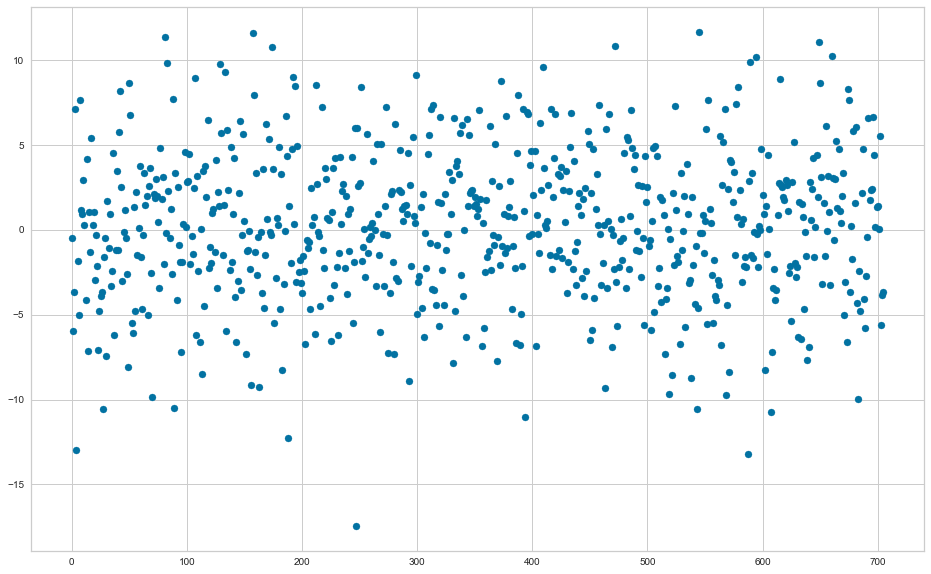

In [97]:
# plotting the errors

plt.scatter(np.arange(len(y_test)), (y_pred_lin-y_test))

In [138]:
# Try with even fewer feature (the one with strongest importance)
more_reduced_feature_list = ['pw_00', 'psa_00', 'psa_01', 'car_00', 'pg_00', 'pg_03', 'target']
df_red_2 = df[more_reduced_feature_list]
df_red_2.head()

,pw_00,psa_00,psa_01,car_00,pg_00,pg_03,target
0,0.742692,0.260191,0.607898,0.273727,0.357455,0.072996,16.773757
1,0.309294,0.290228,0.549788,0.144638,0.698428,0.015835,21.496661
2,0.323393,0.186435,0.677005,0.272220,0.672452,0.167494,10.931425
3,0.677437,0.281229,0.593281,0.127875,0.728014,0.000956,23.119257
4,0.771106,0.196687,0.517578,0.404507,0.753491,0.106953,13.652252


In [139]:
# Train test split with same random seed
# Defining X and y
features2 = df_red_2.columns.tolist()
features2.remove('target')
X = df_red_2[features2]
y = df_red_2.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2116, 6)
y_train: (2116,)
X_test: (706, 6)
y_test: (706,)


In [140]:
# Grid search for Linear Regression for further reduced dataframe

# Defining parameter grid (as dictionary)
param_grid2 = {"fit_intercept" : [True, False],
              "normalize" : [True, False]
             }

# Instantiate gridsearch and define the metric to optimize 
gs2 = GridSearchCV(LinearRegression(), param_grid2, cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data
gs2.fit(X_train, y_train)

/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [141]:
# Evaluate the model (Multiple Linear Regression) --> Grid search
# Best score
print('Best score:', round(gs2.best_score_, 3))

# Best parameters
print('Best parameters:', gs2.best_params_)

Best score: 0.81
Best parameters: {'fit_intercept': True, 'normalize': True}


In [142]:
y_pred2 = gs2.predict(X_test)

In [143]:
# Evaluate the model (Multiple Linear Regression) (Grid Search)

# predicting the model fit
score2 = r2_score(y_test, y_pred2)
print("r2 score is ", round(score2, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred2), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred2)), 2))

r2 score is  0.81
mean_sqrd_error is: 20.02
root_mean_squared error is: 4.47


In [173]:
# Try with more features (the ones with strongest importance (doubled), except languages)
#less_reduced_feature_list = ['pw_00', 'psa_00', 'psa_01', 'car_00', 'car_01', 'pg_00', 'pg_03', 'lln_00', 'lln_01', 'stv_00', 'stv_01', 'target']
# exclude racial data
less_reduced_feature_list = ['pw_00', 'psa_00', 'psa_01', 'car_00', 'car_01', 'lln_00', 'lln_01', 'stv_00', 'stv_01', 'target']
df_red_3 = df[less_reduced_feature_list]
df_red_3.head()

,pw_00,psa_00,psa_01,car_00,car_01,lln_00,lln_01,stv_00,stv_01,target
0,0.742692,0.260191,0.607898,0.273727,0.726273,0.118825,0.881175,0.283468,0.716532,16.773757
1,0.309294,0.290228,0.549788,0.144638,0.855362,0.066903,0.933097,0.103641,0.896359,21.496661
2,0.323393,0.186435,0.677005,0.272220,0.727780,0.100009,0.899991,0.165772,0.834228,10.931425
3,0.677437,0.281229,0.593281,0.127875,0.872125,0.029155,0.970845,0.087768,0.912232,23.119257
4,0.771106,0.196687,0.517578,0.404507,0.595493,0.133552,0.866448,0.345975,0.654025,13.652252


In [174]:
# Train test split with same random seed
# Defining X and y
features3 = df_red_3.columns.tolist()
features3.remove('target')
X = df_red_3[features3]
y = df_red_3.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2116, 9)
y_train: (2116,)
X_test: (706, 9)
y_test: (706,)


In [175]:
# Build a multiple linear regression model with the data
lr2 = LinearRegression()
# fitting the training data
lr2.fit(X_train,y_train)

LinearRegression()

In [178]:
# Feature Importance
eli5.show_weights(lr2)
# ['pw_00', 'psa_00', 'psa_01', 'car_00', 'car_01', 'lln_00', 'lln_01', 'stv_00', 'stv_01', 'target']

Weight?,Feature
+61762928111.582,<BIAS>
+114589.482,x5
+114572.236,x6
+67.074,x1
-6.986,x2
-9.032,x0
-15383.487,x8
-15383.696,x7
-61763027285.211,x4
-61763027309.776,x3


In [117]:
# Grid search for Linear Regression for further reduced dataframe

# Defining parameter grid (as dictionary)
param_grid3 = {"fit_intercept" : [True, False],
              "normalize" : [True, False]
             }

# Instantiate gridsearch and define the metric to optimize 
gs3 = GridSearchCV(LinearRegression(), param_grid3, cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data
gs3.fit(X_train, y_train)

/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:1

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [118]:
# Evaluate the model (Multiple Linear Regression) --> Grid search
# Best score
print('Best score:', round(gs3.best_score_, 3))

# Best parameters
print('Best parameters:', gs3.best_params_)

Best score: -4.333
Best parameters: {'fit_intercept': False, 'normalize': True}


In [119]:
# Evaluate the model (Multiple Linear Regression) (Grid Search)
y_pred3 = gs3.predict(X_test)

# predicting the model fit
score3 = r2_score(y_test, y_pred3)
print("r2 score is ", round(score3, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred3), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred3)), 2))

r2 score is  0.81
mean_sqrd_error is: 19.5
root_mean_squared error is: 4.42


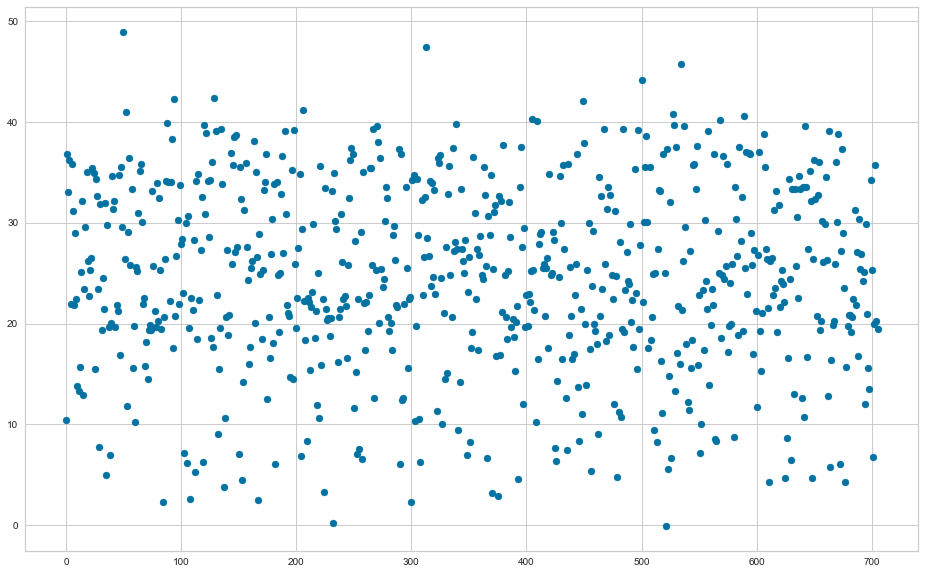

In [120]:
# plotting the errors

plt.scatter(np.arange(len(y_test)), (y_pred3))

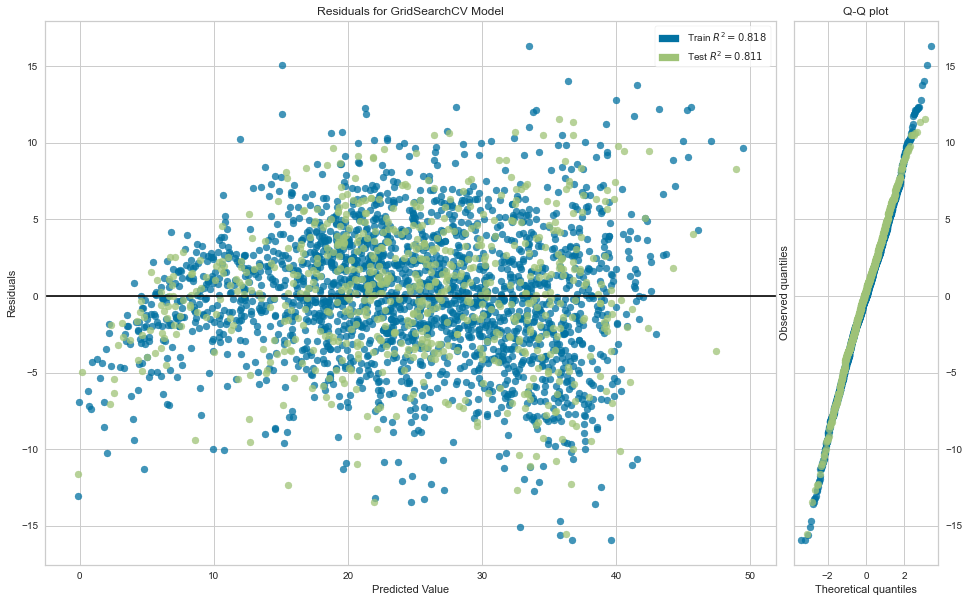

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [121]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(gs3, hist=False, qqplot=True)
#visualizer = ResidualsPlot(gs3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [122]:
# Grid search for Polynomial Regression
poly3 = PolynomialFeatures(2, interaction_only=True)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)


# Defining parameter grid (as dictionary)
param_grid_poly3 = {"fit_intercept" : [True, False],
              "normalize" : [True, False]
             }

# Instantiate gridsearch and define the metric to optimize 
gs_poly3 = GridSearchCV(LinearRegression(), param_grid_poly3, cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data
gs_poly3.fit(X_train_poly3, y_train)

/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/corinna/neuefische/urban-eureka/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [123]:
# Evaluate the model (Multiple Linear Regression) --> Grid search
# Best score
print('Best score:', round(gs_poly3.best_score_, 3))

# Best parameters
print('Best parameters:', gs_poly3.best_params_)

Best score: 0.835
Best parameters: {'fit_intercept': True, 'normalize': False}


In [124]:
# Evaluate the model (Multiple Linear Regression) (Grid Search)
y_pred_poly3 = gs_poly3.predict(X_test_poly3)

# predicting the model fit
score_poly3 = r2_score(y_test, y_pred_poly3)
print("r2 score is ", round(score_poly3, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred_poly3), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred_poly3)), 2))

r2 score is  0.82
mean_sqrd_error is: 18.01
root_mean_squared error is: 4.24


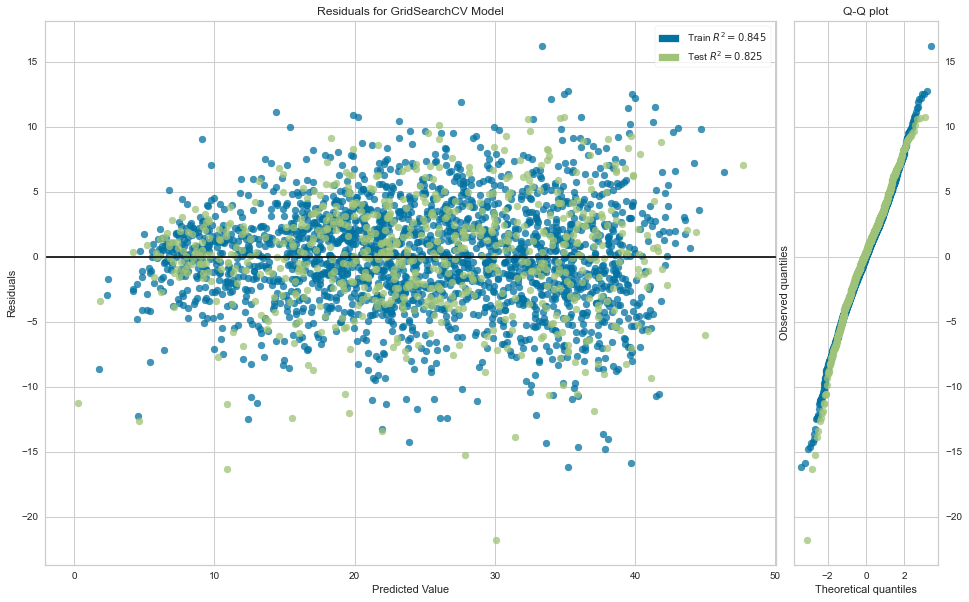

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [125]:
visualizer_poly3 = ResidualsPlot(gs_poly3, hist=False, qqplot=True)
#visualizer = ResidualsPlot(gs_poly3)

visualizer_poly3.fit(X_train_poly3, y_train)  # Fit the training data to the visualizer
visualizer_poly3.score(X_test_poly3, y_test)  # Evaluate the model on the test data
visualizer_poly3.show()

In [191]:
# Extended feature list to check for feature importance

ext_feature_list = ['pw_00', 'pw_01', 'psa_00', 'psa_01', 'car_00', 'lln_00', 'stv_00', 'pg_00', 'pg_01', 'pg_03', 'lan_00', 'lan_01', 'lan_02', 'NL', 'target']
df_red_4 = df[ext_feature_list]
df_red_4.head()

,pw_00,pw_01,psa_00,psa_01,car_00,lln_00,stv_00,pg_00,pg_01,pg_03,lan_00,lan_01,lan_02,NL,target
0,0.742692,0.214027,0.260191,0.607898,0.273727,0.118825,0.283468,0.357455,0.563166,0.072996,0.832913,0.012336,0.001923,0.292039,16.773757
1,0.309294,0.576844,0.290228,0.549788,0.144638,0.066903,0.103641,0.698428,0.278006,0.015835,0.879655,0.008445,0.000328,3.207775,21.496661
2,0.323393,0.483376,0.186435,0.677005,0.272220,0.100009,0.165772,0.672452,0.154225,0.167494,0.565546,0.015991,0.001566,0.000000,10.931425
3,0.677437,0.314194,0.281229,0.593281,0.127875,0.029155,0.087768,0.728014,0.263831,0.000956,0.743812,0.006530,0.001188,2.038778,23.119257
4,0.771106,0.194743,0.196687,0.517578,0.404507,0.133552,0.345975,0.753491,0.129654,0.106953,0.422623,0.014352,0.000842,0.000000,13.652252


In [187]:
# Train test split with same random seed
# Defining X and y
features4 = df_red_4.columns.tolist()
features4.remove('target')
X = df_red_4[features4]
y = df_red_4.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2116, 14)
y_train: (2116,)
X_test: (706, 14)
y_test: (706,)


In [193]:
from sklearn.model_selection import KFold

In [194]:
# Using this to test a model on 5 different splits
kf = KFold(n_splits=5, shuffle=False)

ycol = 'target'
in_cols = ext_feature_list[:-1]

scores = []
for train, test in kf.split(df_red_4):
  lr4 = LinearRegression()
  lr4.fit(df_red_4[in_cols].iloc[train], df_red_4[ycol].iloc[train])
  rmse = np.sqrt(mean_squared_error(df_red_4[ycol].iloc[test], lr4.predict(df_red_4[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 5-fold CV:", np.mean(scores))

3.8570410627643885
4.193870087436731
5.112331039701539
7.130896015065251
4.504494829704856
Average score in 5-fold CV: 4.959726606934554


In [200]:
eli5.show_weights(lr4, feature_names=in_cols)
# ['pw_00', 'pw_01', 'psa_00', 'psa_01', 'car_00', 'lln_00', 'stv_00', 'pg_00', 'pg_01', 'pg_03', 'lan_00', 'lan_01', 'lan_02', 'NL', 'target']

Weight?,Feature
+64.396,psa_00
+31.743,<BIAS>
+13.268,lln_00
+6.598,pg_03
+5.147,stv_00
+0.299,lan_02
-0.047,NL
-0.771,pw_01
-1.659,pg_01
-5.682,psa_01


In [205]:
output = eli5.explain_weights(lr4, feature_names=in_cols)
from eli5.formatters import format_as_dataframe
out_weight_df = format_as_dataframe(output)
out_weight_df.to_csv('data/featureweights.csv', index=False)

Based on the table: x2